# CCTPY 核心概念

## CCTPY 是一个基于单线模型进行 CCT 磁场计算、束线建模、粒子跟踪的程序

## 核心概念——坐标系

**为了便于磁场建模、粒子跟踪、束流分析，cctpy 中引入了全剧坐标系和局部坐标系的概念**

粒子 / 束流运动在全局坐标系中，一般在 XY 平面内运行，如下图所示

<img src="./img/A01坐标_束流在XY平面运行_三维.jpg" width=40%></img>

旋转一下示意图，只看 XY 平面，如下图所示，可见一般而言磁铁也都放置在 XY 平面。

<img src="./img/A02坐标_束流在XY平面运行_二维加上磁铁.jpg" width=40%></img>

为了便于磁铁建模，每个磁铁附上了一个局部坐标系，目的是消除磁铁移动时的开销，局部坐标系如下图所示（图中三个绿色坐标系）

（因为 CCT 磁铁一般由上万个离散的点组成，如果移动 CCT 就要移动这么多的点，开销很大，但如果仅仅移动局部坐标系，则开销很小）

这样一样，为了计算磁铁对粒子产生的磁场，需要进行坐标变换，将粒子的坐标（全局坐标）转为该磁铁的局部坐标，转换完成后，即可计算磁场，而磁场本身也是矢量，所以需要转换回去（局部坐标系下的磁场转为全局坐标系）

<img src="./img/A03坐标_局部坐标系示意图.jpg" width=40%></img>

具体每种磁铁的局部坐标设置方法，详见各自介绍

## CCTPY 的使用

为了便于代码分发，所有 cctpy 代码都写在了一个文件 cctpy.py 中，使用 from cctpy import * 可以如导入全部类

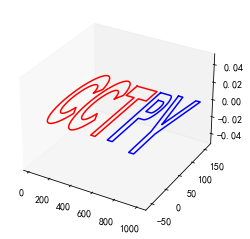

In [1]:
from cctpy import *
Plot3.__logo__()

# 常量

cctpy 中内置了一些常量，共有如下 9 个

In [2]:
print(f"1米{M}")
print(f"1毫米{MM}M")
print(f"光速{LIGHT_SPEED}")
print(f"1弧度{RAD}")
print(f"1毫弧度{MRAD}RAD")
print(f"1焦耳{J}")
print(f"1电子伏特{eV}J")
print(f"1兆电子伏特{MeV}J")
print(f"1MeV/c{MeV_PER_C}J")

1米1.0
1毫米0.001M
光速299792458.0
1弧度1.0
1毫弧度0.001RAD
1焦耳1.0
1电子伏特1.6021766208e-19J
1兆电子伏特1.6021766208000001e-13J
1MeV/c5.3442857792e-22J


# 点和矢量

点和矢量是 cctpy 中最基本的概念，粒子的位置是一个点、粒子速度是一个矢量、CCT 磁铁路径由上万个点组成、磁场也是一个矢量

cctpy 中严格区分 二维点/二维矢量 和 三维点/三维矢量，他们分别由类 P2 和类 P3 表示

## P2

P2 既可以表示二维坐标系中的点 (x, y)，也可以表示二维向量 (x, y)。它包含一下方便的运算操作

- 各种构造器
- length() 求矢量长度
- normalize() 矢量长度归一
- change_length(new_length) 改变矢量长度
- 矢量加法、减法、相反矢量、自加自减、乘法（内积、标量积）、相等判断
- rotate(phi) 矢量旋转(逆时针)
- angle_to_x_axis() 矢量和 x 轴夹角
- angle_to(other) 两个矢量夹角
- to_p3(transformation) 通过某种规则 P2 转换到 P3
- copy() 拷贝矢量


In [3]:
# 创建一个 (0,0)点/矢量
p1 = P2()
p2 = P2.origin()
p3 = P2.zeros()

p1, p2, p3

([0.0, 0.0], [0.0, 0.0], [0.0, 0.0])

In [4]:
# 创建一个 x 轴上的点，或者说和 x 轴平行的矢量
x1 = P2(x=3.14)
x2 = P2.x_direct(4.13)

# 创建一个 y 轴上的点，或者说和 y 轴平行的矢量
y1 = P2(y=6.28)
y2 = P2.y_direct(2.68)

x1, x2, y1, y2

([3.14, 0.0], [4.13, 0.0], [0.0, 6.28], [0.0, 2.68])

In [5]:
# 创建任意一个点，或矢量
p1 = P2(2,3)
p2 = P2(0.1,0.2)

p1, p2

([2.0, 3.0], [0.1, 0.2])

In [6]:
# 求矢量 P2 的长度，或点到原点的距离
p1 = P2(1,1)
p2 = P2(0,2)
p1_len = p1.length()
p2_len = p2.length()


# 矢量长度归一
p1_norm = p1.normalize()
p2_norm = p2.normalize()


# 改变矢量长度
p1_cl = p1.change_length(10)
p2_cl = p2.change_length(-10) # 负数改变了矢量方向

print("矢量长度",p1_len,p2_len)
print("长度归一",p1_norm,p2_norm)
print("改变矢量长度",p1_cl,p2_cl)

矢量长度 1.4142135623730951 2.0
长度归一 [0.7071067811865475, 0.7071067811865475] [0.0, 1.0]
改变矢量长度 [7.071067811865475, 7.071067811865475] [-0.0, -10.0]


In [7]:
# 矢量加法、减法
p1 = P2(2,3)
p2 = P2(1,1)
p_add = p1+p2
p_sub = p1-p2
print('矢量加法',f"{p1}+{p2}={p_add}")
print('矢量减法',f"{p1}-{p2}={p_sub}")

# 相反矢量
p1_neg = -p1
p2_neg = -p2
print('相反矢量',f"-{p1}={p1_neg}")
print('相反矢量',f"-{p2}={p2_neg}")

# 自加自减，会修改自身大小
print(f"p1={p1}")
p1+=p2
print(f"自加 p1+={p2}",f"p1={p1}")

p1-=p2
print(f"自减 p1-={p2}",f"p1={p1}")

# 乘法（内积、标量积）
m1 = p1*p2
m2 = p2*p1
m3 = p1*3
m4 = 2*p2
print("内积",f"{p1}*{p2}={m1}")
print("内积",f"{p2}*{p1}={m2}")
print("标量积",f"{p1}*{3}={m3}")
print("标量积",f"{2}*{p2}={m4}")


# 相等判断
judge1 = p1==p2
judge2 = p1==p2+P2(1,2)
print("相等判断",f"{p1}=={p2} is {judge1}")
print("相等判断",f"{p1}=={p2}+{P2(1,2)} is {judge2}")

# 注意，因为浮点数误差，默认允许 1e-6 范围误差
print("相等判断，默认允许 1e-6 范围误差：",f"{P2(0,0)}=={P2(1E-7,1E-8)} is {P2(0,0)==P2(1E-7,1E-8)}")
# 可以调用等号操作符 == 的原函数 __eq__ 指定误差
print("相等判断，指定误差 1e-10：",f"{P2(0,0)}=={P2(1E-7,1E-8)} is {P2(0,0).__eq__(P2(1E-7,1E-8), err=1e-10)}")


矢量加法 [2.0, 3.0]+[1.0, 1.0]=[3.0, 4.0]
矢量减法 [2.0, 3.0]-[1.0, 1.0]=[1.0, 2.0]
相反矢量 -[2.0, 3.0]=[-2.0, -3.0]
相反矢量 -[1.0, 1.0]=[-1.0, -1.0]
p1=[2.0, 3.0]
自加 p1+=[1.0, 1.0] p1=[3.0, 4.0]
自减 p1-=[1.0, 1.0] p1=[2.0, 3.0]
内积 [2.0, 3.0]*[1.0, 1.0]=5.0
内积 [1.0, 1.0]*[2.0, 3.0]=5.0
标量积 [2.0, 3.0]*3=[6.0, 9.0]
标量积 2*[1.0, 1.0]=[2.0, 2.0]
相等判断 [2.0, 3.0]==[1.0, 1.0] is False
相等判断 [2.0, 3.0]==[1.0, 1.0]+[1.0, 2.0] is True
相等判断，默认允许 1e-6 范围误差： [0.0, 0.0]==[1e-07, 1e-08] is True
相等判断，指定误差 1e-10： [0.0, 0.0]==[1e-07, 1e-08] is False


红线平行于 x 轴
黄线：旋转45度
绿线：旋转120度
蓝线：旋转-45度


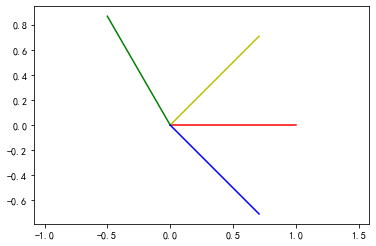

In [8]:
# rotate(phi) 矢量旋转(逆时针)
p = P2(1,0)
p_rot45 = p.rotate(BaseUtils.angle_to_radian(45))
p_rot120 = p.rotate(BaseUtils.angle_to_radian(120))
p_rot_neg45 = p.rotate(BaseUtils.angle_to_radian(-45)) # 负数顺时针旋转

print("红线平行于 x 轴")
print("黄线：旋转45度")
print("绿线：旋转120度")
print("蓝线：旋转-45度")

Plot2.plot_p2s([P2.origin(), p], 'r-')
Plot2.plot_p2s([P2.origin(), p_rot45], 'y-')
Plot2.plot_p2s([P2.origin(), p_rot120], 'g-')
Plot2.plot_p2s([P2.origin(), p_rot_neg45], 'b-')
Plot2.equal()
# Plot2.show()


# 注释： 
# BaseUtils.angle_to_radian(deg) 角度转弧度
# Plot2.plot_p2s([], describe) 绘制由 P2 点组成的线
# Plot2.equal() 设置坐标轴 x 和 y 比例相等
# Plot2.show() 绘制图象


In [9]:
# 求矢量和 x 轴夹角
p = P2(1,1)
p1 = P2(1,-1)
p_angle_to_x = p.angle_to_x_axis()
p1_angle_to_x = p1.angle_to_x_axis()
print(f"rad = {p_angle_to_x}, 转为角度制 {BaseUtils.radian_to_angle(p_angle_to_x)}")
print(f"rad = {p1_angle_to_x}, 转为角度制 {BaseUtils.radian_to_angle(p1_angle_to_x)}")

# 求矢量 p1 到 p2 的夹角，顺时针方向
p2 = P2(-1,0)
p_to_p2 = p.angle_to(p2)
p2_to_p = p2.angle_to(p)
print(f"p_to_p2={p_to_p2} rad, 转为角度制 {BaseUtils.radian_to_angle(p_to_p2)}")
print(f"p2_to_p={p2_to_p} rad, 转为角度制 {BaseUtils.radian_to_angle(p2_to_p)}")


rad = 0.7853981633974483, 转为角度制 45.0
rad = 5.497787143782138, 转为角度制 315.0
p_to_p2=2.356194490192345 rad, 转为角度制 135.0
p2_to_p=3.9269908169872414 rad, 转为角度制 225.0


In [10]:
# to_p3(transformation) 通过某种规则 P2 转换到 P3
# 如果规则为空，则 (x, y) 转为 (x, y, 0)
p = P2(1,2)
p3 = p.to_p3()
print(p3)

# 可以指定一个 P2 到 P3 的函数
p3 = p.to_p3(lambda p:P3(z=p.x+p.y))
print(p3)

[1.0, 2.0, 0.0]
[0.0, 0.0, 3.0]


In [11]:
# copy() 拷贝
p = P2(1,1)
p_copy = p.copy()
p.x = 3.14
print(f"p={p}, p_copy={p_copy}") 

p=[3.14, 1.0], p_copy=[1.0, 1.0]


## P3

P2 既可以表示三维坐标系中的点 (x, y, z)，也可以表示三维向量 (x, y, z)。它包含一下方便的运算操作

- 多种构造方法
- 矢量长度、归一化、改变矢量长度
- 加法、减法、相反数、自加、自减、乘法（标量乘、内积、**外积**）、相等判断
- copy() 拷贝

P3 的使用方法基本和 P2 相同，这里只展示构造方法和外积

In [12]:
# 构造 P3
# 使用构造器
p1 = P3()
p2 = P3(x=1,y=2)
p3 = P3(z=4,x=1)
p4 = P3(3.14,6.28,1.414)

print(p1,p2,p3,p4)

# 使用静态方法
p5 = P3.x_direct()
p6 = P3.y_direct(4)
p7 = P3.z_direct(-2)

print(p5,p6,p7)

# 两个特殊方法，构造原点和零矢量
p8 = P3.origin()
p9 = P3.zeros()
print(p8,p9)

[0.0, 0.0, 0.0] [1.0, 2.0, 0.0] [1.0, 0.0, 4.0] [3.14, 6.28, 1.414]
[1.0, 0.0, 0.0] [0.0, 4.0, 0.0] [0.0, 0.0, -2.0]
[0.0, 0.0, 0.0] [0.0, 0.0, 0.0]


In [13]:
# 三维矢量叉乘，使用符号 @
x = P3.x_direct()
y = P3.y_direct()
z = P3.z_direct()

print(f"x × y = {x@y}")
print(f"y × z = {y@z}")
print(f"z × x = {z@x}","单位矢量叉乘重要结论")

print(f"y × x = {y@x}","矢量叉乘不满足交换律")

x × y = [0.0, 0.0, 1.0]
y × z = [1.0, 0.0, 0.0]
z × x = [0.0, 1.0, 0.0] 单位矢量叉乘重要结论
y × x = [0.0, 0.0, -1.0] 矢量叉乘不满足交换律


# BaseUtils 基础工具

这个类中有许多基础的函数，便于程序开发

- equal() 判断两个对象是否相等，带有容忍误差，同时支持报错处理
- linspace()，同 numpy 中用于生成均匀分布的 linspace 方法
- angle_to_radian / radian_to_angle 角度和弧度互相转换
- circle_center_and_radius(p1,p2,p3) 计算三个点确定的圆，返回(圆心,半径)
- polynomial_fitting(xs,ys,order) 多项式拟合
- print_traceback 打印函数调用栈（这个主要用于 debug）
- Ellipse 椭圆对象。用于生成椭圆圆周上均匀分布的若干点

In [14]:
# equal(a, b, err: float = 1e-6, msg: str = None) 判断两个对象是否相等，带有容忍误差，同时支持报错处理
# 判断 a b 是否相等，相等返回 true
# 当 a b 不相等时，若 msg 为空，返回 flase，否则抛出异常，异常信息即 msg
# err 表示容忍的误差，默认值 1e-6

print(BaseUtils.equal(1,2))
print(BaseUtils.equal(P2.origin(),P2.zeros()))
print(BaseUtils.equal(P3.z_direct(),P3(z=1)))

print(BaseUtils.equal(3.14, math.pi, err=0.01))

a = 1; b = 2
try:
    print(BaseUtils.equal(a,b,msg=f"出现错误，{a} 和 {b} 不相等"))
except AssertionError as ae:
    print(ae)


False
True
True
True
出现错误，1 和 2 不相等


In [15]:
# linspace(start, end, number: int)，同 numpy 中用于生成均匀分布的 linspace 方法

print(BaseUtils.linspace(0, 1, 5))
print(BaseUtils.linspace(P2(), P2(x=1), 5))
print(BaseUtils.linspace(P3(z=1), P3(), 3))

[0.0, 0.25, 0.5, 0.75, 1.0]
[[0.0, 0.0], [0.25, 0.0], [0.5, 0.0], [0.75, 0.0], [1.0, 0.0]]
[[0.0, 0.0, 1.0], [0.0, 0.0, 0.5], [0.0, 0.0, 0.0]]


In [16]:
# angle_to_radian(deg)
# radian_to_angle(rad)
# 角度和弧度互相转化，支持列表

print(BaseUtils.angle_to_radian(180))
print(BaseUtils.radian_to_angle([math.pi/10,math.pi/5,math.pi/3]))

3.141592653589793
[18.0, 36.0, 59.99999999999999]


圆心=[5.875, 2.0],半径=2.125


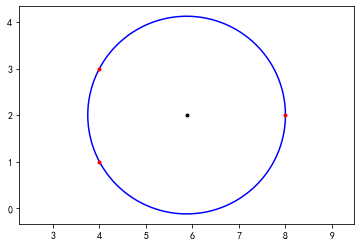

In [17]:
# circle_center_and_radius(p1,p2,p3) 计算三个点确定的圆，返回(圆心,半径)
p1 = P2(4,3)
p2 = P2(4,1)
p3 = P2(8,2)

center,r = BaseUtils.circle_center_and_radius(p1,p2,p3)
print(f"圆心={center},半径={r}")

circle = [center + r*P2(math.cos(t),math.sin(t)) for t in BaseUtils.linspace(0,2*math.pi,361)]

Plot2.plot_p2s(circle,'b-')
Plot2.plot_p2(p1,'r.')
Plot2.plot_p2(p2,'r.')
Plot2.plot_p2(p3,'r.')
Plot2.plot_p2(center,'k.')
Plot2.equal()
# Plot2.show()



In [18]:
# polynomial_fitting(xs,ys,order) 多项式拟合
xs = numpy.linspace(0,10,11)
ys = 4*xs**2 + 3*xs + 2 + numpy.random.randn(11)*0.01

coefficient = BaseUtils.polynomial_fitting(xs, ys, 2)

# 返回值是一个数组，下标 i 的项是第 i 阶系数
print(coefficient)

[1.9992020766841778, 3.0003897026081354, 3.9998459070899175]


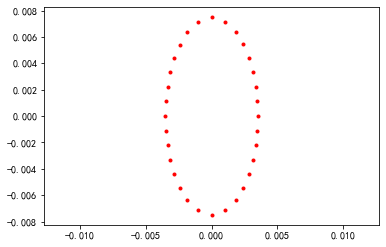

In [19]:
# Ellipse 椭圆对象。用于生成椭圆圆周上均匀分布的若干点
# 支持生成 Ax^2+Bxy+Cy^2=D 的椭圆

e = BaseUtils.Ellipse(A=1/(3.5*MM)**2,B=0,C=1/(7.5*MM)**2,D=1)

# 生成椭圆圆周上均匀分布的 32 个点
points = e.uniform_distribution_points_along_edge(32)
Plot2.plot_p2s(points,'r.')
Plot2.equal()
# Plot2.show()

# Magnet 磁铁对象

CCT 和 QS 都是磁铁，将其中和磁场相关的函数抽取出来，放入父类 Magnet 中

Magnet **表示一个可以在全局坐标系任意一点产生磁场的对象**，它具有如下实用的函数

- magnetic_field_at(p) 计算点 p 处的磁场，注意 p 是一个全局坐标系表示的点

- magnetic_field_along(line2, p2_to_p3, step) 计算二维曲线 line2 上磁场分布，p2_to_p3 表示二维曲线上的二维点 P2 到三维点 P3 的转换策略（本质即一个函数），步长取 step

- magnetic_field_bz_along(line2, p2_to_p3, step) 计算二曲线 line2 上磁场 Z 方向分量的分布，p2_to_p3 表示二维曲线上的二维点 P2 到三维点 P3 的转换策略（本质即一个函数），步长取 step。（前文已经提及，cctpy 中粒子一般运动在 XY 坐标系，所以二级场参数的磁场主分量在 Z 方向）

- graident_field_along(line, good_field_area_width, step, point_number) 计算曲线 line 上磁场梯度分布，曲线上每一个点的梯度，采用过取该点一条垂直于曲线的线段，对这条线段上 point_number 个点的磁场 Bz 做一阶多项式拟合得到。good_field_area_width 表示线段长度。详见下图

<img src="./img/A04曲线上梯度计算方法.jpg"></img>

- second_graident_field_along(line, good_field_area_width, step, point_number) 计算曲线 line 上磁场二极梯度分布，即六极场分布。参数意义和计算方法见上函数。

- multipole_field_along(line, order, good_field_area_width, step, point_number) 计算曲线 line 上任意阶场的分布，其中 order 表示阶数。order=0 则只计算二级场，order=1 计算二级场和四极场，以此类推。计算方法也是直线段上多项式拟合。

- integration_field(lien, step) 计算 line 上积分场。

- slice_to_cosy_script(Bp.aperture_radius,line,good_field_area_width,min_step_length,tolerance) 将 line 上分布的磁场，转为 COSY 磁场切片。

# ApertureObject 带有孔径的对象

CCT、QS 磁铁、漂移段都是带有孔径的对象。粒子在运动过程中有可能会偏转过大，超出孔径，ApertureObject 的 is_out_of_aperture(p) 函数可以判断点 p 是否在孔径的外面。

如下图所示，#粒子在孔径外部，@粒子在孔径内部。可以看出，只有当粒子轴向投影在元件内部时，才会进行判断，否则即时粒子距离轴线很远，也认为粒子没有超出孔径。这时因为粒子不在元件内时，很可能处于另一个大孔径元件中，这是会造成误判。

<img src="./img/A08带孔径对象之粒子是否超出孔径.jpg" width=80%></img>

# LocalCoordinateSystem 局部坐标系（重要概念）

局部坐标系。各种磁铁都放置在局部坐标系中，而粒子在全局坐标系中运动，为了求磁铁在粒子位置产生的磁场，需要引入局部坐标的概念和坐标变换。

LocalCoordinateSystem 类中提供了如下函数

- 方便的构造器
- point_to_local_coordinate / point_to_global_coordinate 点的全局坐标 ←→ 局部坐标之间的转化
- vector_to_local_coordinate / vector_to_global_coordinate 矢量的全局坐标 ←→ 局部坐标之间的转化（因为矢量具有平移不变性，所以和点的行为不同）

In [20]:
# 下面创造了一个全局坐标系，通过指定坐标轴的原点，和 x 轴和 z 轴的方向
# y 轴方向不用指定，由 z@x 计算得到
gcs = LocalCoordinateSystem(location=P3.origin(),x_direction=P3.x_direct(),z_direction=P3.z_direct())

# 使用默认值，就是全局坐标系
gcs_1 = LocalCoordinateSystem()

# 同样也可以调用函数 global_coordinate_system 直接获得全局坐标系
gcs_2 = LocalCoordinateSystem.global_coordinate_system()

print("全局坐标系：", gcs)
print(gcs_1)
print(gcs_2)

全局坐标系： ORIGIN=[0.0, 0.0, 0.0], xi=[1.0, 0.0, 0.0], yi=[0.0, 1.0, 0.0], zi=[0.0, 0.0, 1.0]
ORIGIN=[0.0, 0.0, 0.0], xi=[1.0, 0.0, 0.0], yi=[0.0, 1.0, 0.0], zi=[0.0, 0.0, 1.0]
ORIGIN=[0.0, 0.0, 0.0], xi=[1.0, 0.0, 0.0], yi=[0.0, 1.0, 0.0], zi=[0.0, 0.0, 1.0]


## 坐标平移

如下图所示，令坐标系 XYZ 是全局坐标系，系X'Y'Z'的原点在全局坐标系的坐标是(2,2,1)。

则如果黑点在全局坐标系中坐标为 (2,3,3)，那么容易计算它在系X'Y'Z'中的坐标是 (2,3,3)-(2,2,1) = (0,1,2)

<img src="./img/A05坐标轴平移.jpg" width=40%></img>

下面用代码展示这一过程

In [21]:
# X'Y'Z' 局部坐标系，因为相对于全局坐标系只有原点 location 不同，所以 x_direction 和 z_direction 使用默认值
lcs = LocalCoordinateSystem(location=P3(2,2,1))

# 定义全局坐标系中的点
p_gcs = P3(2,3,3)

# 转为局部坐标系
p_lcs = lcs.point_to_local_coordinate(p_gcs)

# 可以再次转回全局坐标
p_gcs_2 = lcs.point_to_global_coordinate(p_lcs)

print(p_gcs)
print(p_lcs)
print(p_gcs == p_gcs_2)


[2.0, 3.0, 3.0]
[0.0, 1.0, 2.0]
True


## 坐标旋转

如下图所示，XYZ 是全局坐标系，首先绕 Z 轴旋转 30 度（逆时针），得到局部坐标系 X'Y'Z'，再移动 (8,8,0)，得到局部坐标系 X''Y''Z''。

注意：这里的移动矢量 (8,8,0) 坐标为全局坐标。

<img src="./img/A06坐标轴旋转.jpg"></img>



In [22]:
lcs_1 = LocalCoordinateSystem(x_direction=P3(
    math.cos(BaseUtils.angle_to_radian(30)),
    math.sin(BaseUtils.angle_to_radian(30)),
    0
))

lcs_2 = LocalCoordinateSystem(location=P3(8,8,0),
    x_direction=P3(
    math.cos(BaseUtils.angle_to_radian(30)),
    math.sin(BaseUtils.angle_to_radian(30)),
    0
))

p = P3(10,16,0)

p1 = lcs_1.point_to_local_coordinate(p)
p2 = lcs_2.point_to_local_coordinate(p)


print(p1==P3(8+5*math.sqrt(3),-5+8*math.sqrt(3),0.0))
print(p2==P3(4+math.sqrt(3),-1+4*math.sqrt(3),0.0))

p1_gcs = lcs_1.point_to_global_coordinate(p1)
p2_gcs = lcs_1.point_to_global_coordinate(p2)

print(p1_gcs==p)
print(p1_gcs==p)

True
True
True
True


## 关于坐标轴其他需要补充的

1. 坐标系不支持缩放，因为所有坐标系的单位矢量 xi yi zi 都会自动被归一化

# 用于刻画设计轨道的类 Trajectory

cctpy 中，束流一般运行于 XY 平面，磁铁也一般放置在 XY 平面中，因此 cctpy 中提供了设计 XY 平面轨道的类 Trajectory。

类关系示意图如下，Trajectory 类表示设计轨道，一般而言设计轨道由直线段和圆弧组成，分别由 StraightLine2 和 ArcLine2 表示，这三个类都继承于抽象类 Line2，它代表二维中任意一条曲线段，汇总了和曲线相关的函数。

<img src="./img/A07轨迹类UML.jpg" width=80%></img>

Trajectory 类中使用最多的函数是在设计轨迹的尾部添加一段直线 add_straight_line() 或圆弧 add_arc_line()。

*可见参考轨道只能设计在 XY 平面，因为这样的限制一般不会对设计产生影响（因为绝大多数束线都在一个平面上）。而如果考虑三维轨迹，会对磁场分析带来复杂性。*

**在 cctpy 中，设计参考轨道是束线设计的第一步，只有先确定参考轨道，才便于在轨道上放置各类磁铁**。下面结合一个实际的机架参考轨迹设计案例，了解 Trajectory 类的使用方法。



ISOC 位置 [8.162644337939188, 0.00028200192290395165]
束线总长度 14.302001244130768


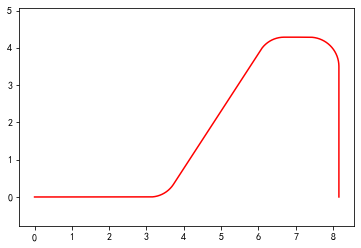

In [23]:
# 设计一段机架
t = ( # 使用括号，方便书写链式语法
    Trajectory
        # 设计轨道的起点，一般就设为原点
        .set_start_point(start_point=P2.origin())
        # 添加第一条直线段，需要给出直线的方向和长度
        .first_line2(direct=P2.x_direct(), length=3.1)
        # 添加一段圆弧，半径0.746，逆时针，偏转角度57度
        .add_arc_line(radius=0.746, clockwise=False, angle_deg=57)
        # 添加一条直线段，只需要给出长度 4.3，因为必须和之前的轨迹相切
        .add_strait_line(length=4.3)
        .add_arc_line(radius=0.746, clockwise=True, angle_deg=57)
        .add_strait_line(length=0.684)
        .add_arc_line(radius=0.7854, clockwise=True, angle_deg=90)
        .add_strait_line(length=3.5)
)

# 绘图
Plot2.plot_line2(t)
Plot2.equal()
# Plot2.show()

# 查看 ISOC 位置
end = t.point_at_end()
print('ISOC 位置',end)

# 查看束线总长度
total_length = t.get_length()
print('束线总长度',total_length)

# Protons 用于质子的相关计算



# RunningParticle 表示全局坐标系中运动的一个粒子

# ParticleFactory 粒子工厂，用于方便的生成粒子

# ParticleRunner 粒子运动指挥所

# PhaseSpaceParticle 像空间中的粒子

# CCT 磁铁

# QS 磁铁

QS 磁铁是一种可以产生四极场（quadrupole）和六极场（sextupole）的多功能组合磁铁，有利于束线设计的紧凑性。当六极场设为 0 时，可以当作普通的四极磁铁使用，同理当四极场为 0 时，可以当作普通的六极磁铁。

注意：在 cctpy 中，QS 磁铁采用硬边模型计算磁场，不涉及边缘场。

定义一个 QS 磁铁，需要如下参数：
- 磁铁所在局部坐标系
- 磁铁长度 length
- 梯度大小 gradient
- 二阶梯度（六极场梯度）大小 second_gradient
- 半孔径 aperture_radius


<div style="border-style:solid;">注意：陈庚指出纯六极场的梯度为 2By/(r<sup>2</sup>)，这里的系数 2 一直被疏忽了。考虑 y=0 的点，则多极场磁场分布为 B = a<sub>0</sub> + a<sub>1</sub>x + a<sub>2</sub>x<sup>2</sup> + .. + a<sub>n</sub>x<sup>n</sup>，恒明显第 2(i+1) 极场梯度为 (∂<sup>i</sup>B/∂x<sup>i</sup>)<sub>x=0</sub>=(i!)a<sub>i</sub>。也就是说梯度是∂<sup>i</sup>B/∂x<sup>i</sup>，而不是B/x<sup>i</sup>。cctpy 中按照此定义</div>

## QS 磁铁的局部坐标系

下面代码首先定义了一条束线（起点为原点，y 方向长度 1m），然后将 QS 磁铁放置在束线 0.4m 的位置。QS 磁铁具体参数见代码中注释。

<div><small>本文档使用 jupyter notebook 编写，不支持 matplotlib 三维绘图，所以用三引号注释了代码中的绘图部分，将代码复制到单独的 python 文件中运行，即可查看绘图效果。本文中也将绘图结果放置在了下方</small></div>


In [30]:
# 定义设计轨道，从原点出发，y 方向 1 米的直线轨道
trajectory = (Trajectory
    .set_start_point(P2.origin())
    .first_line2(direct=P2.y_direct(), length=1 * M)
)

# 放置 QS 磁铁，位于先前定义的 trajectory 上，位置为 0.4m
# QS 磁铁长度 0.27m，四极场梯度 20T/m，六极场梯度 0，半孔径 60mm
qs = QS.create_qs_along(
    trajectory,
    s=0.4 * M,
    length=0.27 * M,
    gradient=20,
    second_gradient=0,
    aperture_radius=60 * MM,
)

"""
Plot3.plot_line2(trajectory, describe="y--") # 绘制设计轨道，黄色虚线
Plot3.plot_qs(qs, describe="b-") # 绘制 QS 磁体，蓝线
Plot3.plot_local_coordinate_system(qs.local_coordinate_system,axis_lengths=[0.1,0.1,0.3],describe='k-') # 绘制 QS 磁铁所处的局部坐标系，黑线
Plot3.set_box(P3(-0.2,0,-0.2), P3(0.2,1,0.2)) # 设置三维绘图视界范围
Plot3.off_axis() # 不绘制坐标轴
Plot3.remove_background_color() # 去除背景颜色
Plot3.show() # 展示图片
"""
pass

<img src='./img/A09QS磁铁.jpg'></img>

如上图所示，黄色虚线是设计轨道，蓝色圆柱表示 QS 磁铁，重点关注 QS 磁铁的局部坐标系，**它附着在 QS 磁铁上，原点即 QS 磁铁入口中心，Z 轴即 QS 磁铁轴线方向，X 轴为处于水平面上，Y 轴为垂线方向**

可以尝试修改 QS 磁铁的局部坐标系，再绘制图象观察。





In [31]:
qs.local_coordinate_system.location -= qs.local_coordinate_system.XI * 30 * MM

这行代码将 QS 的局部坐标系原点，以局部坐标的 X 负方向移动 30mm，下图反映了这一变化，可见 QS 磁铁轴线脱离了设计轨道（黄色虚线）

<img src='./img/A09QS磁铁MOVE.jpg'></img>

查看此时，轨道上二极场和四极场分布：

In [ ]:
B2 = qs.magnetic_field_bz_along(trajectory)
B4 = qs.graident_field_along(trajectory)

Plot2.plot_p2s(B2)
Plot2.plot_p2s(B4)
# Plot2.show()

# 方便绘图的 Plot2 Plot3